# Discrimination in Tennis: An Examination of Age and Territorial Biases

DSCI 100 \
*Team Members: Aleyna, Camille, Erik, Yulong*

***
#### *INTRODUCTION*

Tennis has been an integral sport within the world since 1859 (Lake 2). Globally, the tennis season is almost always on, stretching from January all the way to November (Lake 96)! It offers “global profile, status and prestige from playing success, as well as lucrative financial rewards and a range of commercial opportunities,” with trips to major cities such as Melbourn, Paris, London, and New York City, and prize pools of over 50 million (Lake 96)! Given this sport with such historical value and a global presence, we wanted to explore any potential biases through age or country of origin within the international tennis community (Lake 19). We achieve this by examining a dataset of the top 500 tennis players in the world, and visualizing money per player through age group and country of origin.

Research on discrimination in the sports industry had proliferated a few decades after the first signing of an African American into the MLB (Wladimir 144). Despite overcoming the racial barrier, discrimination still prevailed and was evident in hiring and salary. This is exemplified in previous research which reported major league teams recruiting African Americans to play lower positions on the field as those positions were paid less (Wladimir 117). In a different study, by a researcher named Vloz, if recruited as a quarterback, they were more likely to be benched compared to their caucasian counterparts (Wladimir 118). Mainly, this article focuses on basketball, baseball, and football. However, there was little or no mention of tennis. In our current research, we aspire to investigate possible discrimination in tennis and any biases within this integral sport.

***Our Question:*** Can the top ranking countries and the varying ages between tennis players be used to predict their competition winnings, and does this reveal an underlying partiality between the factors?

***Classifier:*** Earnings\
***Predictors:*** Country, Age, Rank, Seasons\
***Dataset:*** Tennis Player Stats for Top 500 Players


*** 
#### *PRELIMINARY EXPLORATORY DATA ANALYSIS*


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(stringr)
set.seed(2022)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
data <- read.csv(url("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"))

In [3]:
#Tidying the Data

data <- mutate(data, str_replace(data$Age, " \\s*\\([^\\)]+\\)", ""))
data <- mutate(data, Age = str_replace(data$Age, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Current.Rank = str_replace(data$Current.Rank, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Best.Rank = str_replace(data$Best.Rank, " \\s*\\([^\\)]+\\)", ""))

money <- c(data$Prize.Money)
money <- money %>%
        lapply(gsub, pattern="$", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="US", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="All-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="11th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="10th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="14th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="2nd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="27th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="30th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="4th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="28th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="6th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="33rd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="26th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="48th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="41st", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="")

data_selected <- data %>%
            mutate(data, Prize.Money = money) %>%
            select(Age, Name,Country, Current.Rank, Best.Rank, Prize.Money,Seasons) %>%
            mutate(Prize.Money = gsub(",","", Prize.Money))

tidy_data <- data_selected %>% 
        filter(Prize.Money != "") %>%
        mutate(Prize.Money = as.numeric(Prize.Money)) %>%
        mutate(Age = as.numeric(Age)) %>%
        mutate(Current.Rank = as.numeric(Current.Rank)) %>%
        mutate(Best.Rank = as.numeric(Best.Rank)) %>%
        mutate(Seasons = as.numeric(Seasons)) %>%
        mutate(Prize.Money = Prize.Money/Seasons)

tidy_data <- drop_na(tidy_data)

Warning message:
“Problem with `mutate()` input `Prize.Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize.Money` is `as.numeric(Prize.Money)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


   ***

#### *METHODS*
We strive to discover the significance of the country of origin and age of a tennis player when looking at their chances to win prizes. To achieve this goal, we will examine how many players there are per country and their age, and compare it with the amount of money made per country.

In [4]:
#Splitting the data

split_data <- initial_split(tidy_data, prop = 0.75, strata = Prize.Money)  
training_data <- training(split_data)   
testing_data <- testing(split_data)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

New names:
* NA -> ...3



Country,n,avg_award_in_USD
<chr>,<int>,<dbl>
United Kingdom,7,745227.6
Argentina,8,454643.2
Serbia,8,360795.9
Japan,10,320105.2
Australia,13,278131.9
France,15,459706.8
Spain,19,652559.6
Italy,20,314682.0
Germany,21,222830.4


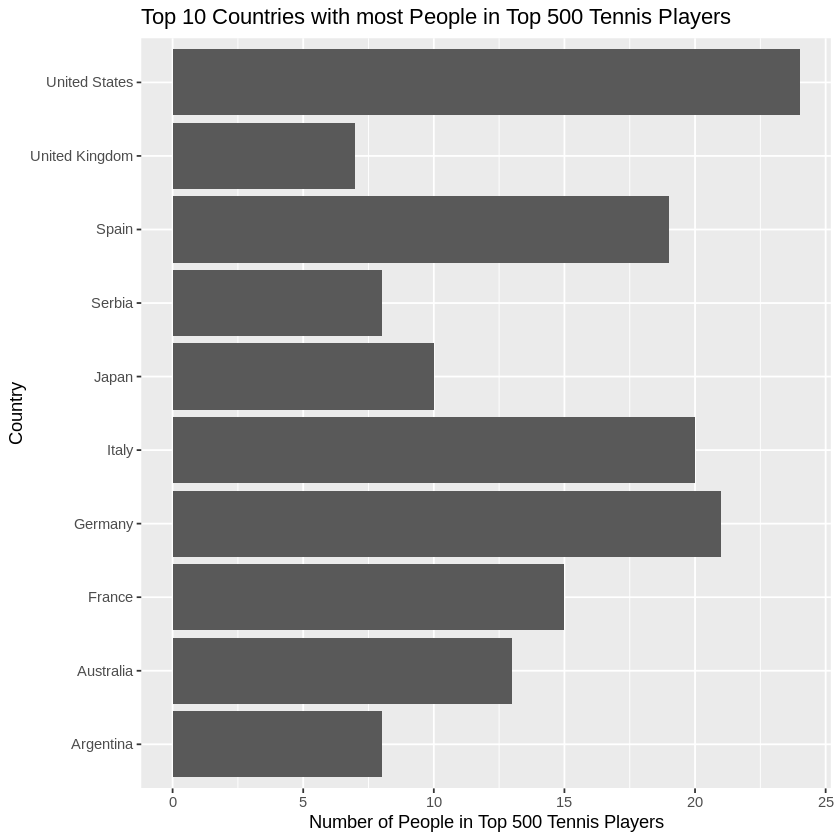

In [5]:
# Find average prize money for each country's players
table1 <- training_data %>%
    group_by(Country) %>%
    summarize(avg_award_in_USD = mean(Prize.Money)) 

avg_award_in_USD <- table1$avg_award_in_USD

# count each country's number of players and then bind the data with the average prize money column from above
final_table <- training_data %>%
    group_by(Country) %>%
    summarize(n = n()) %>%
    bind_cols(avg_award_in_USD) %>%
    mutate(avg_award_in_USD = ...3) %>%
    select(-...3)

# Find top 10 country with the most players
top_10 <- final_table %>%
        arrange(n) %>%
        tail(10)

# Plot the number of players for each top 10 country
top_10_graph <- ggplot(top_10,aes(x = Country, y = n)) +
        geom_bar(stat = "identity") +
        labs(x = "Country", y = "Number of People in Top 500 Tennis Players") +
        ggtitle("Top 10 Countries with most People in Top 500 Tennis Players") +
        coord_flip()

top_10_graph

# Final "top 10" table with player counts and average prize money
tibble(top_10)

top_10_names <- pull(top_10, Country)



***
We will use the **country column** to derive how many players there are per country, then the **age and prize money columns** to assess the correlation between the variables. In order to reduce bias, we will compare the **average ranking** of all the players in  countries when drawing conclusions.
***

In [6]:
# Start working on Top 10
top_10_data <- filter(tidy_data, Country == "United States"| Country == "United Kingdom" | Country == "Spain" | 
                     Country == "Russian Federation" | Country == "Japan" | Country == "Italy" |
                     Country == "Germany" | Country == "France" | Country == "Australia"| Country == "Argentina")

top_10_tennis_data <- initial_split(top_10_data, prop = 0.75, strata = Prize.Money)  
top_10_training_data <- training(top_10_tennis_data)   
top_10_testing_data <- testing(top_10_tennis_data)

In [7]:
# Our model
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
      set_engine("kknn") %>%
      set_mode("regression") 

# Our recipe
tennis_recipe <- recipe(Prize.Money ~ ., data = top_10_training_data) %>%
      step_rm(Name,Country) %>%
      step_scale(all_predictors()) %>%
      step_center(all_predictors()) 

In [8]:
# Cross-validation
tennis_vfold <- vfold_cv(top_10_training_data, v = 5, strata = Prize.Money)

# Workflow
tennis_workflow <- workflow() %>%
     add_recipe(tennis_recipe) %>%
     add_model(tennis_spec)

# Find k value
tennis_k_min <- tennis_workflow %>%
      tune_grid(resamples = tennis_vfold, grid = 10) %>%
      collect_metrics() %>%
      filter(.metric == "rmse") %>%
      arrange(mean) %>%
      slice(1) %>%
      pull(neighbors)

In [9]:
# set up a model with k = tennis_k_min
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tennis_k_min) %>%
        set_engine("kknn") %>%
        set_mode("regression")

# final fit
final_fit <- workflow() %>%
        add_recipe(tennis_recipe) %>%
        add_model(final_spec) %>%
        fit(data= top_10_training_data)

# predict on the test set
predicted_result <- final_fit %>%
        predict(top_10_testing_data) %>%
        bind_cols(top_10_testing_data)

predicted_result

# RMSPE (accuracy) of Prediction
RMSPE <- predicted_result %>%
        metrics(truth = Prize.Money, estimate = .pred)

RMSPE

.pred,Age,Name,Country,Current.Rank,Best.Rank,Prize.Money,Seasons
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
107021.77,28,Sekou Bangoura,United States,307,213,278709.00,1
653415.84,23,Daniil Medvedev,Russian Federation,4,4,2101538.60,5
872242.99,31,Juan Martin Del Potro,Argentina,121,3,1849256.14,14
786951.49,33,Marcel Granollers,Spain,130,19,772940.57,14
88252.72,26,Andres Artunedo Martinavarr,Spain,448,293,32892.00,1
118318.66,27,Agustin Velotti,Argentina,384,166,59712.00,4
90760.37,22,Yusuke Takahashi,Japan,432,238,62529.00,1
692461.87,29,Daniel Evans,United Kingdom,32,32,177057.38,13
393471.21,21,Ugo Humbert,France,43,43,354118.33,3


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.350642e+05
rsq,standard,4.465965e-01
mae,standard,1.908795e+05


***
We will use **histograms** to visualize how much money different age groups make, **scatter plots** to visualize any influence of age on predicted prize winnings, and **bar graphs** to visualize how much money different countries make. 
***

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


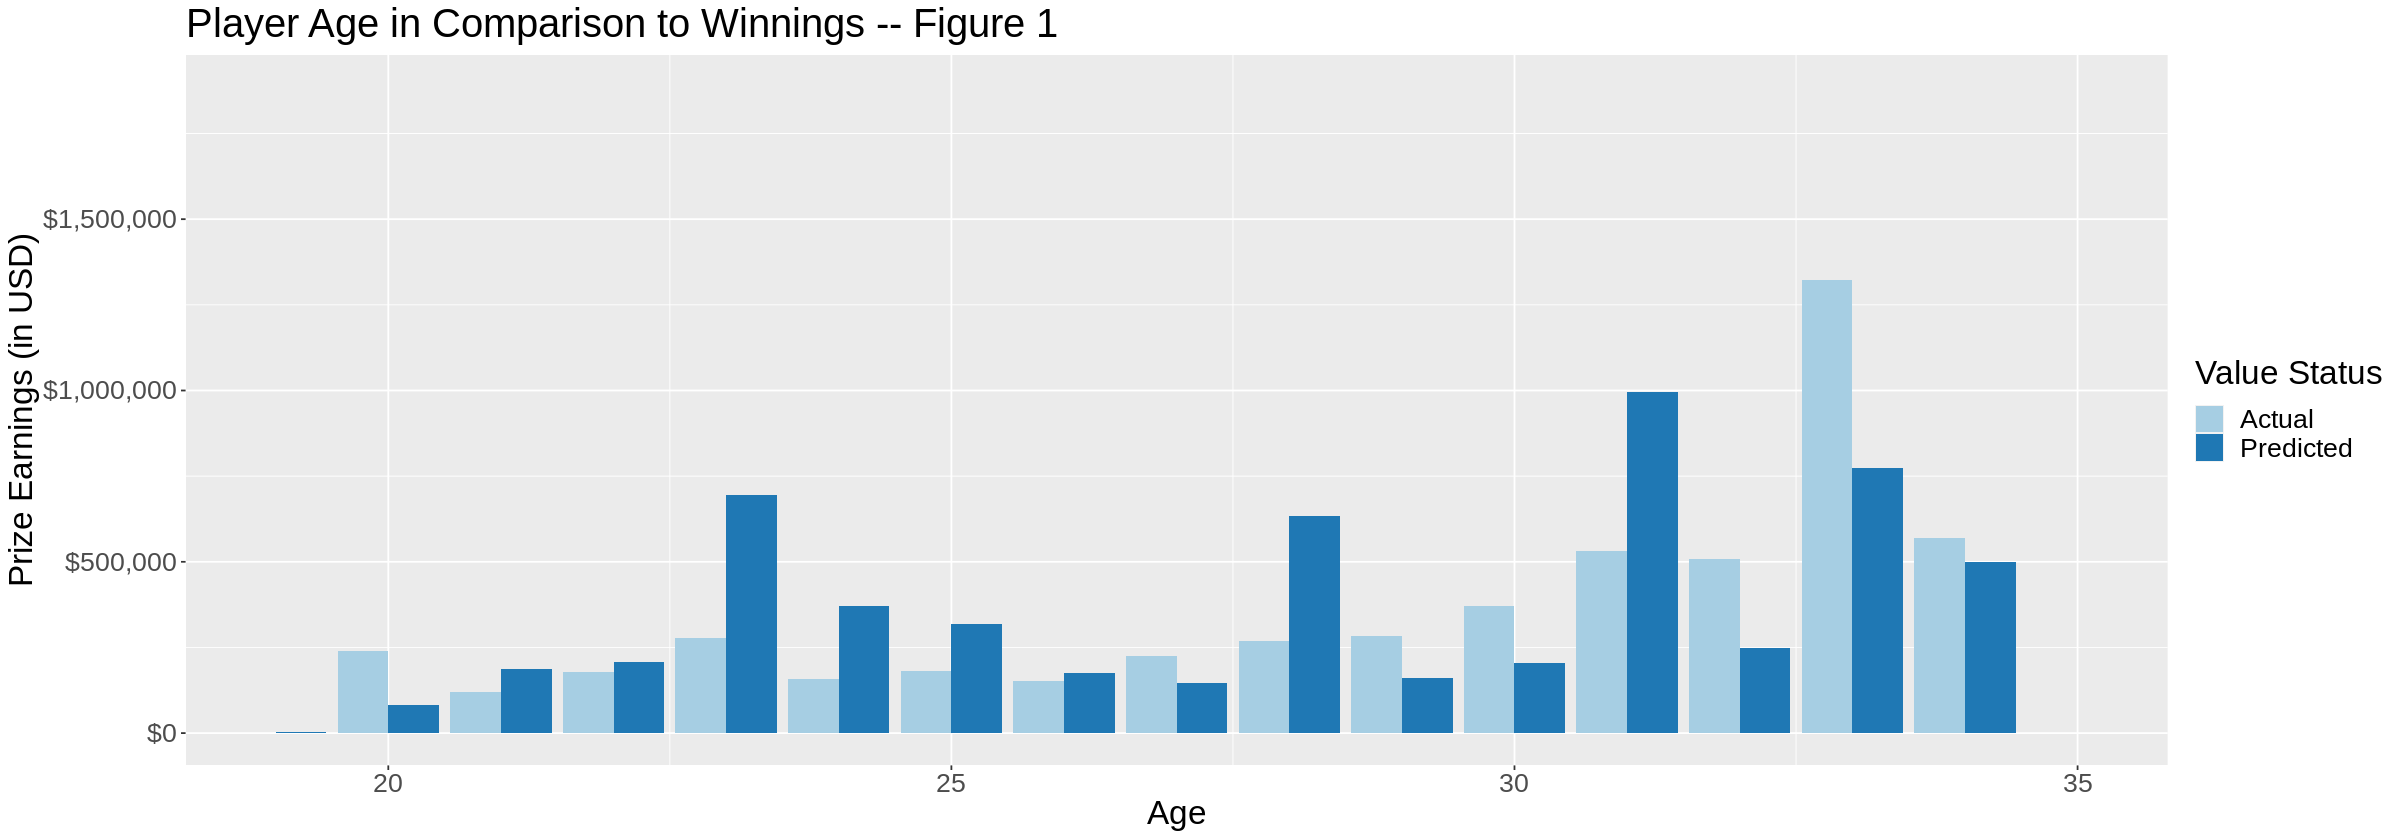

In [10]:
#Bar Graph Age vs Money

options(repr.plot.width = 20, repr.plot.height = 7)

pred <- c("Predicted")

Age_vs_PrizeMoneyPred <- predicted_result %>%
    group_by(Age) %>%
    summarize(Prize.Money = mean(Prize.Money)) %>%
    cbind(pred)
# Age_vs_PrizeMoneyPred

pred <- c("Actual")

Age_vs_PrizeMoney <- training_data %>%
    group_by(Age) %>%
    summarize(Prize.Money = mean(Prize.Money)) %>%
    cbind(pred)
# Age_vs_PrizeMoney

bar_data <- rbind(Age_vs_PrizeMoney, Age_vs_PrizeMoneyPred)
# bar_data

tennis_histogram_plot <- ggplot(bar_data, aes(fill=pred, y=Prize.Money, x=Age)) + 
    geom_bar(position="dodge", stat="identity") +
    labs(x = "Age", y = "Prize Earnings (in USD)", fill = "Value Status") +
    ggtitle("Player Age in Comparison to Winnings -- Figure 1") +
    theme(text = element_text(size = 20)) +
    scale_y_continuous(labels = dollar_format()) +
    scale_fill_brewer(palette="Paired") +
    xlim(c(19,35))

tennis_histogram_plot

`summarise()` ungrouping output (override with `.groups` argument)



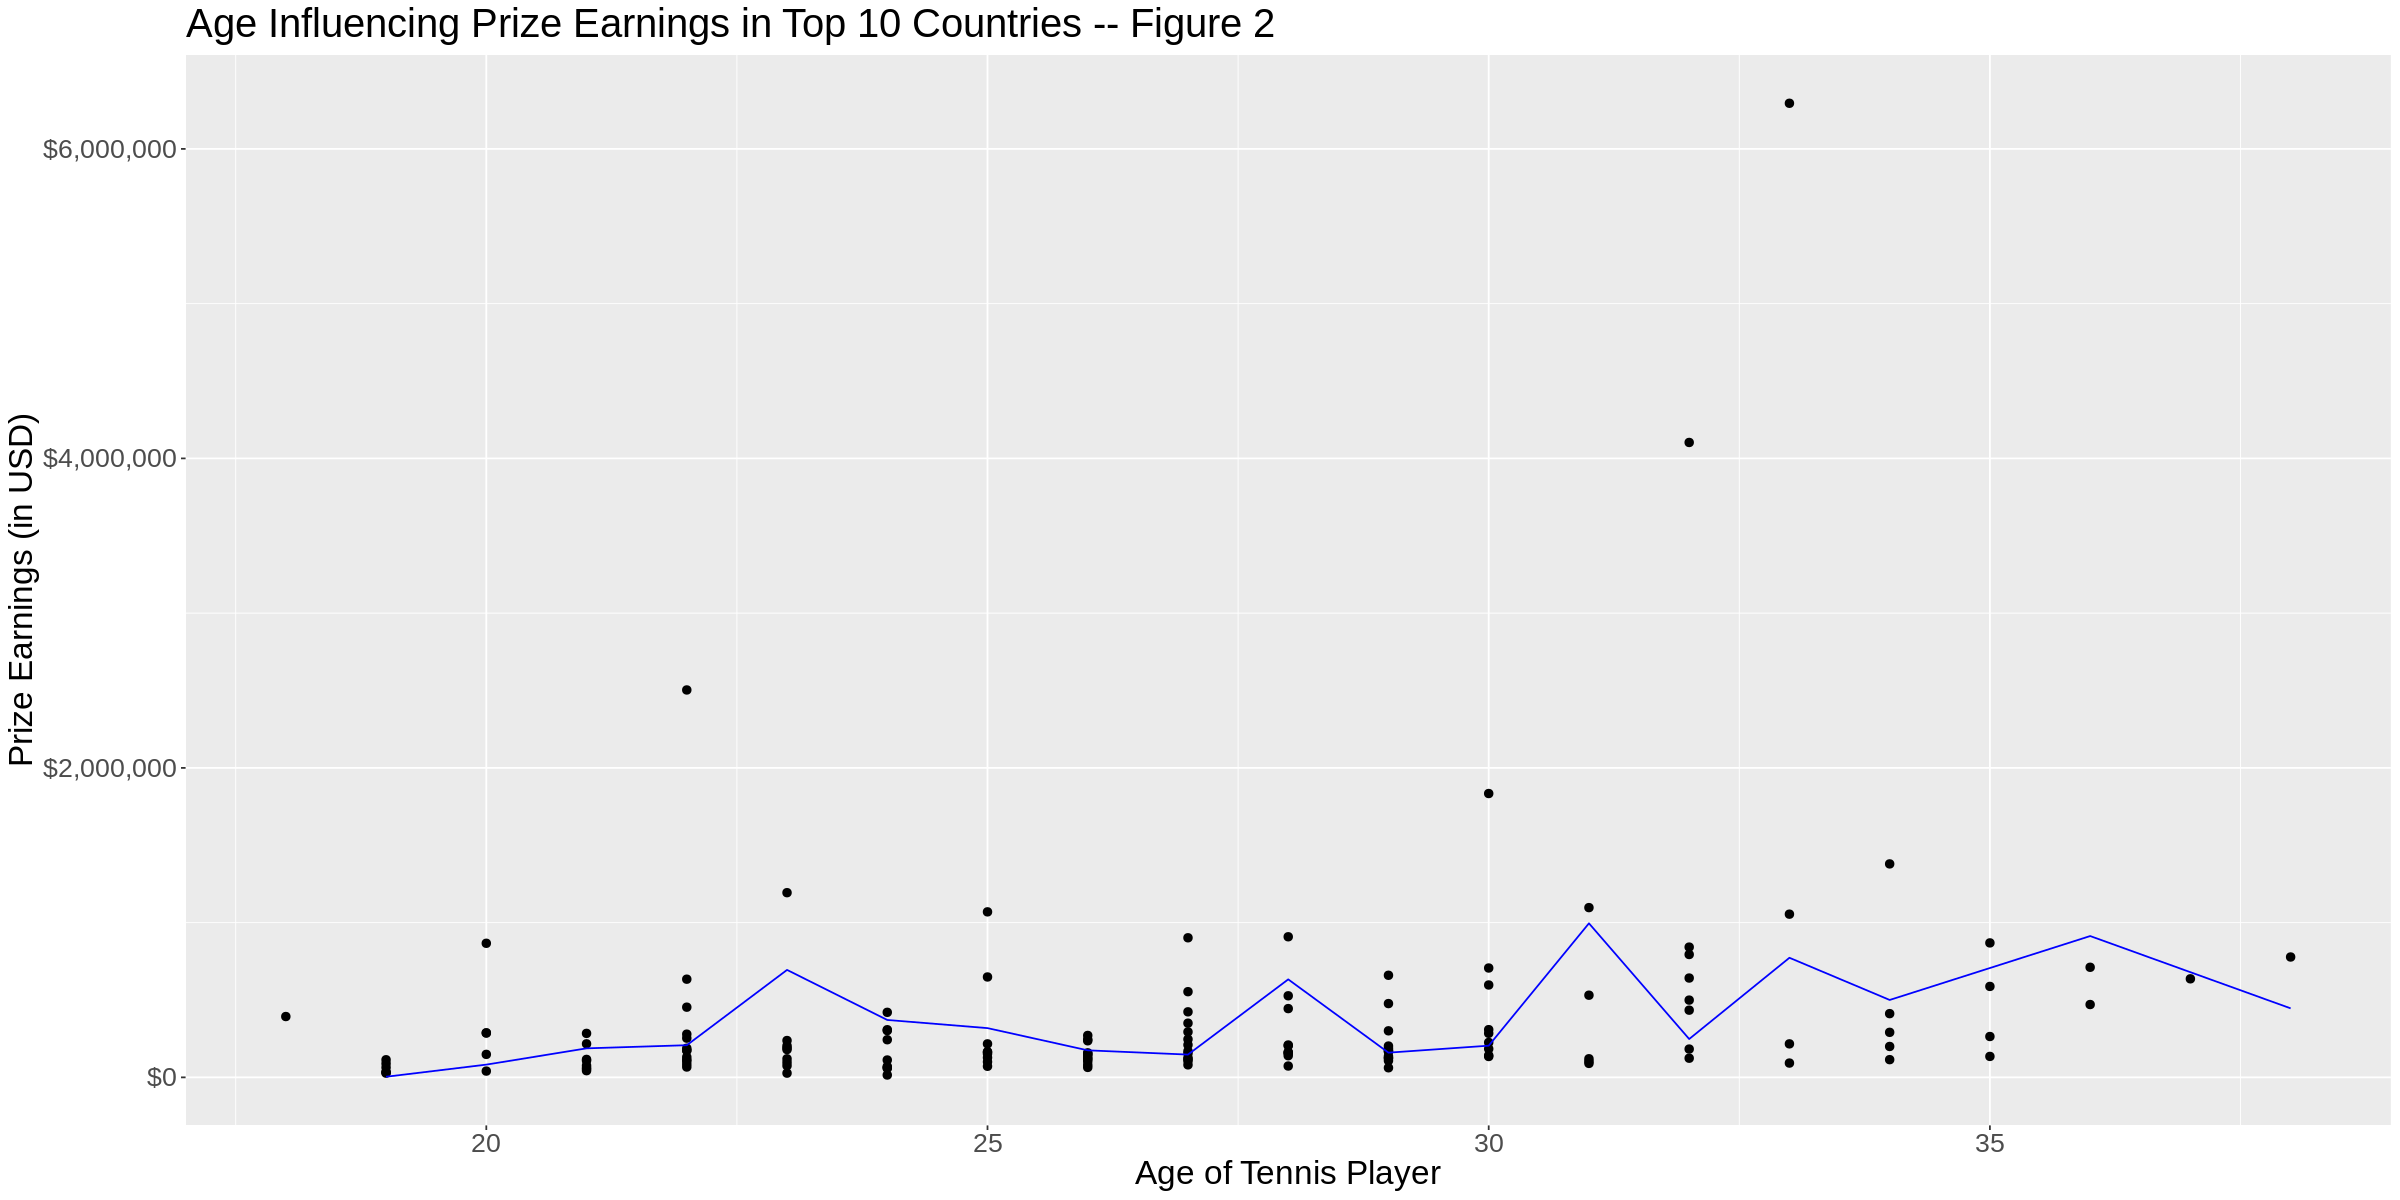

In [32]:
# Graph using train_data for scatter points and predicted_result for prediction line
options(repr.plot.width = 20, repr.plot.height = 10)

# averaged age
top_10_mean_age <- predicted_result %>%
    group_by(Age) %>%
    summarize(mean_PrizeMoney = mean(Prize.Money))

tennis_final_plot <- ggplot(top_10_training_data, aes(x = Age, y = Prize.Money)) +
        geom_point(size = 2) +
        geom_line(data = top_10_mean_age,
                 mapping = aes(x = Age, y = mean_PrizeMoney),
                  color = "blue") +
        labs(x = "Age of Tennis Player", y = "Prize Earnings (in USD)") +
        scale_y_continuous(labels = dollar_format()) +
        ggtitle("Age Influencing Prize Earnings in Top 10 Countries -- Figure 2") +
        theme(text = element_text(size = 20))

tennis_final_plot

`summarise()` ungrouping output (override with `.groups` argument)



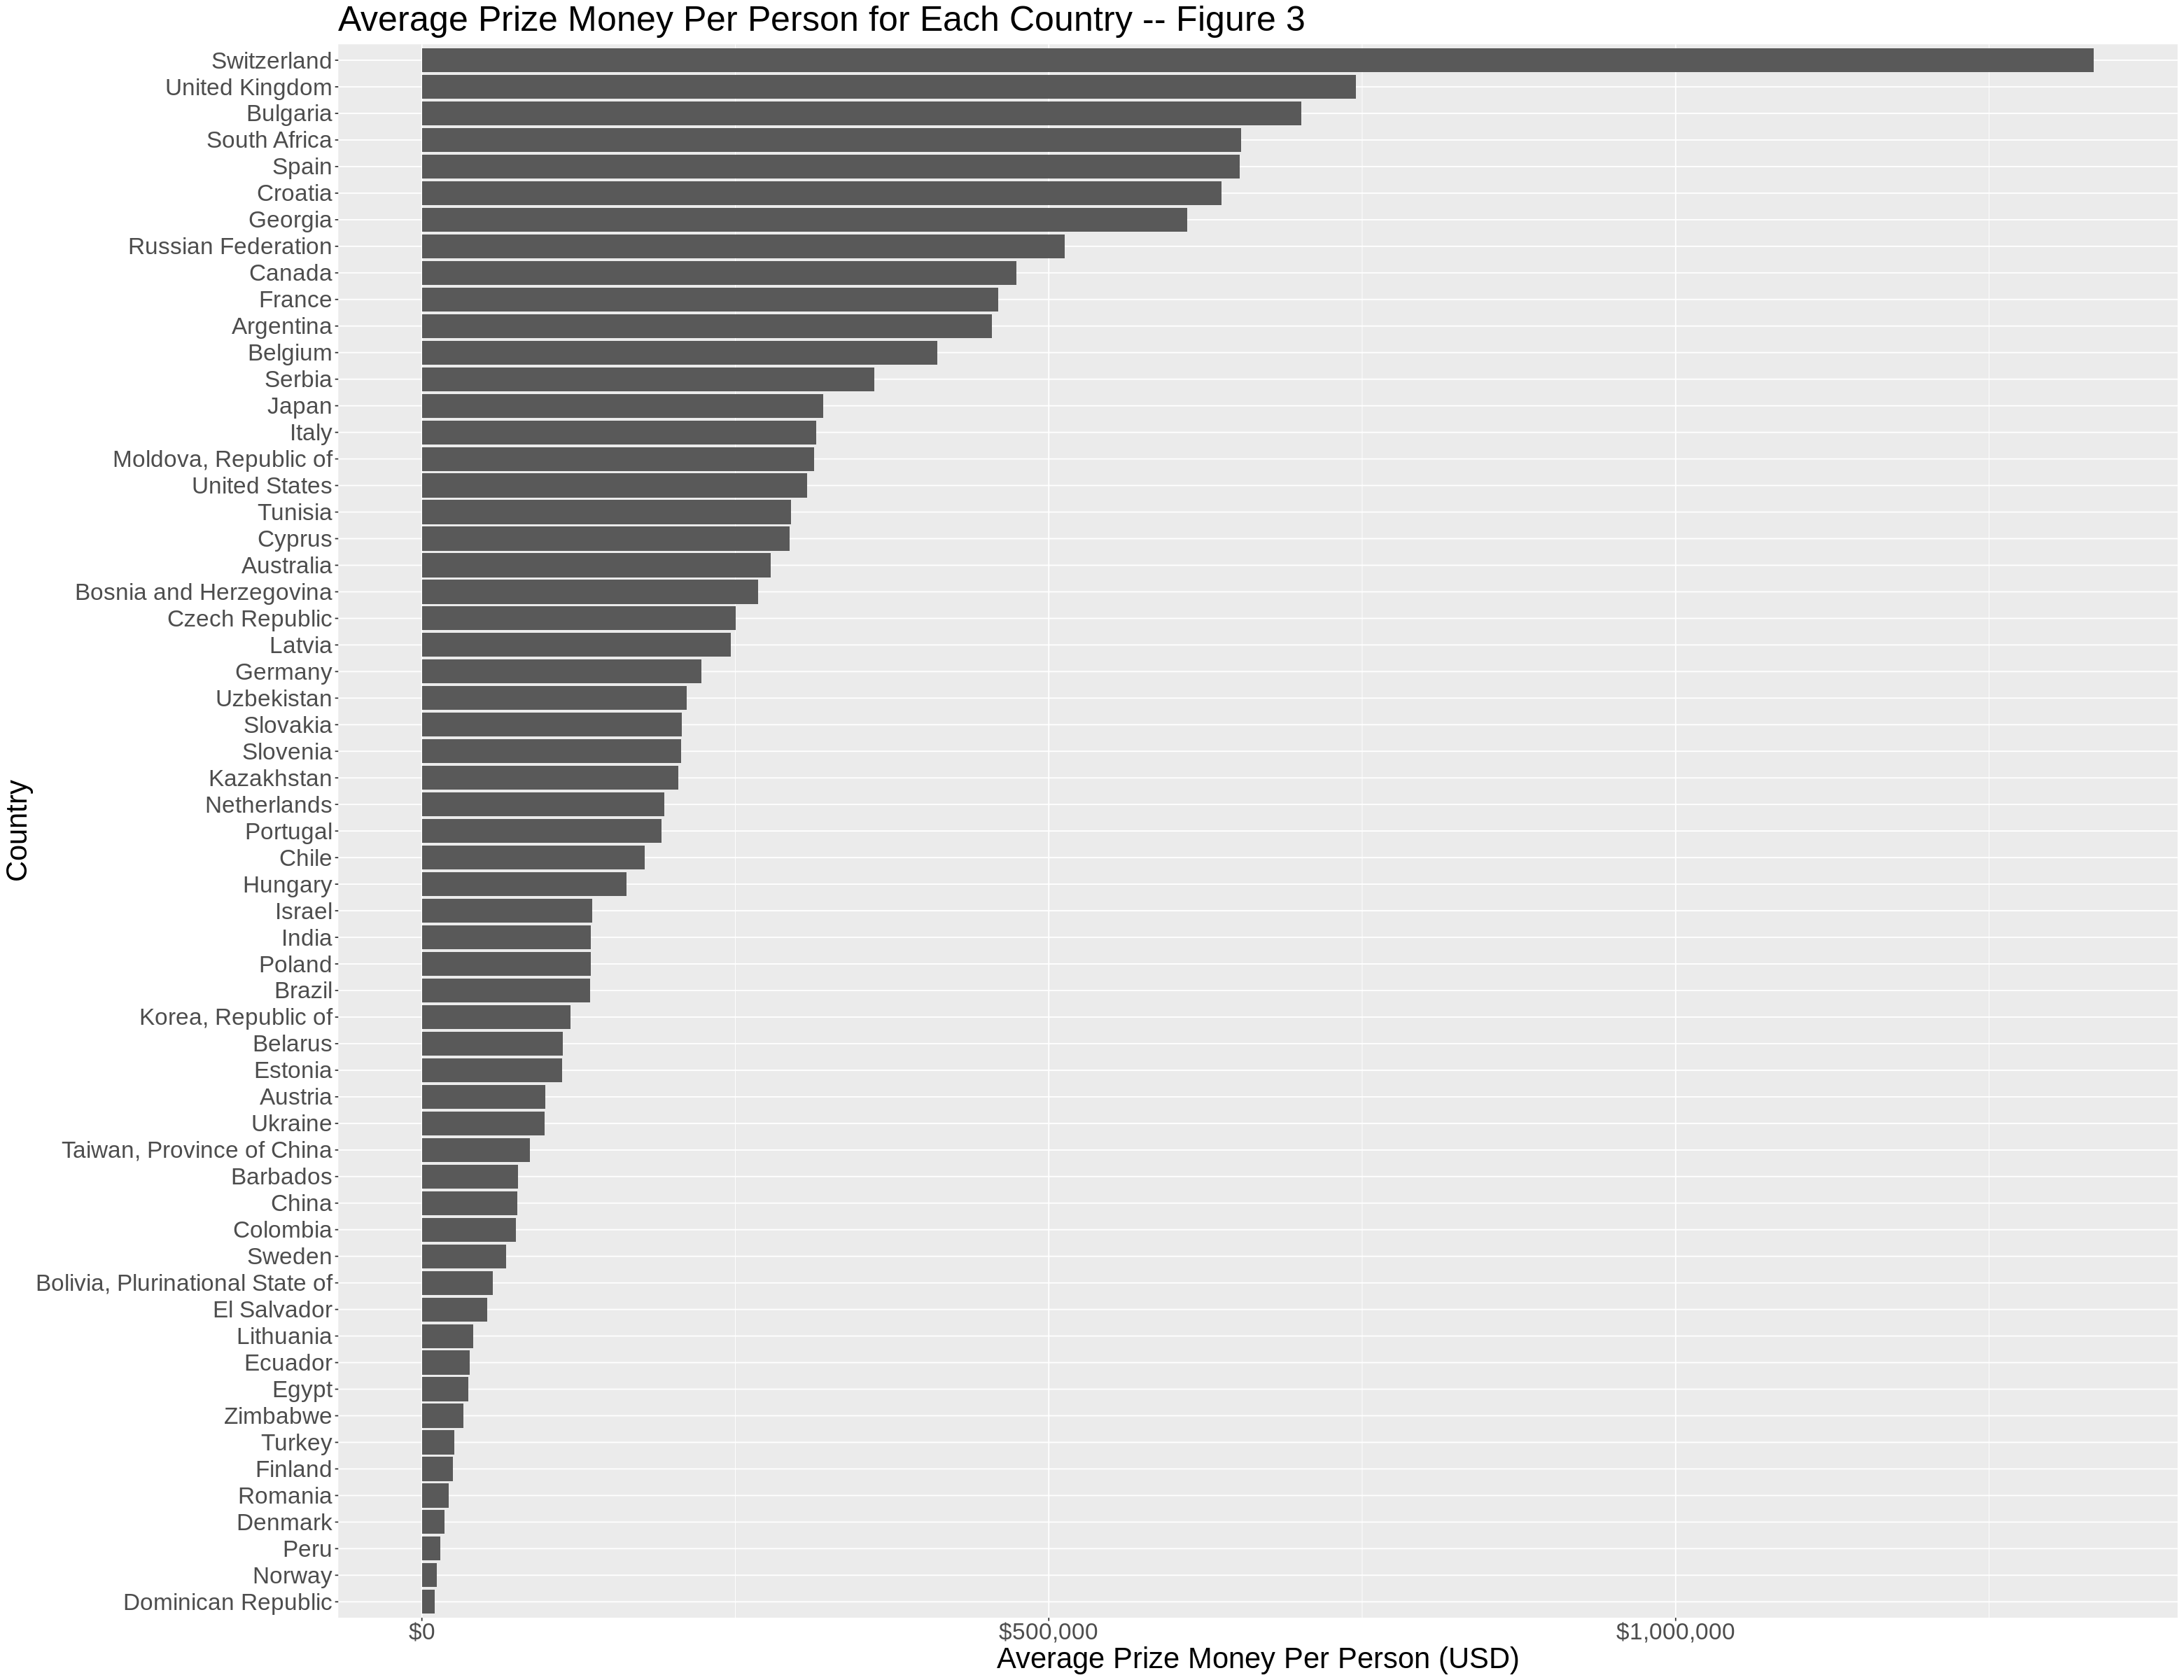

In [29]:
# Graph for Country vs Money
options(repr.plot.width = 26, repr.plot.height = 20)

Country_vs_Money_data <- training_data %>%
    group_by(Country) %>%
    summarize(Prize.Money = mean(Prize.Money))

Country_vs_Money <- ggplot(Country_vs_Money_data, aes(x = Prize.Money, 
                                                      y = fct_reorder(Country, 
                                                      Prize.Money))) +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 25)) +
    scale_x_continuous(labels = dollar_format()) +
    labs(x = "Average Prize Money Per Person (USD)", y = "Country") +
    ggtitle("Average Prize Money Per Person for Each Country -- Figure 3")

Country_vs_Money

***
#### *EXPECTED OUTCOMES AND SIGNIFICANCE*

***What did we find?*** \
According to the "Average Prize Money Per Person for Each Country" bar chart, it is very surprising that Switzerland players made the most money while US players only ranked 17th in terms of amount of money earned on average. Players from Switzerland earned a lot more on average compared to other players (**Figure 3**). Countries such as France and Spain are known to produce the best tennis talent, but their players does not make outstanding prize earnings. Also, younger players did not demonstrate an absolute advantage in performance as expected, as prize money appears to be overall evenly distributed across ages after accounting for seasons played (**Figure 1**). Based on the "Age and Ethnicity Influencing Prize Earnings in Top 10 Countries" scatter plot and predicted trend, a worth-mentioning trend is that players aged more than 30 years are expected to earn bigger prizes in the prediction model, though extrapolation could be a concern for such presumable trend (**Figure 2**). Possible explanation is that older players had accumulated more competition experiences and had higher ranks based on collected data.

***Is it what we expected?*** \
These findings are far from what we expected! We originally expected US players to earn the most prize money, due to the US's competitive nature. We discovered, however, that UK players earned a lot more on average, even when compared to the US. Another thing we expected is that we thought younger, newer players would make more overall given their potential, however we found that players over 30 tended to make more overall.

***What impact could such findings have?*** \
Obtaining evidence on the top earning players’ ethnicity could reveal potential **biases** or underlying **discrimination** towards a country in tennis. As more research is done towards sport-related biases (such as age and ethnicity), we hope that the insights provided by research can aspire the sports industry to make **fair** and **inclusive** sporting events for all players. In the perspective of tennis coaches, this data could be used to recruit prospective tennis players.

***What future questions could this lead to?*** \
Because of our unexpected results of country and prize money, this should prompt researchers to understand why UK players are earning more than players from different countries. This information can be potentially investigated by observing quality of coaching, quality of equipment, and hours of practice of each player. In addition, the unexpected results with age arises questions of why 30 year old players earn more than younger players. One reason could be that they have more experience; this could be examined by looking into each players years of experience and background information on their training regimen. Lastly, since our data analysis is only limited to tennis, it poses the question if other sports, such as soccer, football, and baseball, **have the same biases?** If not, what other predictors would have more weight than predictors used in our predicting model? 

***
#### *REFERENCES*

Andreff, Wladimir. An economic roadmap to the dark side of sport. Cham: Palgrave Macmillan, 2019. Web. 25 Mar 2022.

Lake, Robert J. Routledge Handbook of Tennis. Abingdon: Routledge, 2019. Taylor & Francis Group. Web. 25 Mar 2022.

Data Downloaded From: https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS